# 팩토리얼 구현
- n! = 1 x 2 x 3 x ... x (n-1) x n
- 수학적으로 0!과 1!의 값은 1입니다. 

In [1]:
# 반복적으로 구현한 n!
def factorial_iterative(n):
    result = 1
    # 1부터 n까지의 수를 차례대로 곱하기
    for i in range(1, n + 1):
        result *= i
    return result 

# 재귀적으로 구현한 n!
def factorial_recursive(n):
    if n <= 1: # n이 1 이하인 경우 1을 반환
        return 1
    # n! = n * (n - 1)!를 그대로 코드로 작성하기
    return n * factorial_recursive(n - 1)

# 각각의 방식으로 구현한 n! 출력 (n = 5)
print('반복적으로 구현', factorial_iterative(5))
print('재귀적으로 구현', factorial_recursive(5))

반복적으로 구현 120
재귀적으로 구현 120


# 최대공약수 계산 (유클리드 호제법) 예제
- 두 개의 자연수에 대한 최대공약수를 구하는 대표적인 알고리즘으로는 유클리드 호제법이 있다.
**유클리드 호제법**
- 두 자연수 A, B에 대하여 (A>B) A를 B로 나눈 나머지를 R이라고 한다.
- 이때, A와 B의 최대공약수는 B와 R의 최대공약수와 같다.
- 유클리드 호제법의 아이디어를 그대로 재귀 함수로 작성할 수 있다.
    - 예시: GCD(192, 162)
    

In [2]:
def gcd(a, b):
    if a % b == 0:
        return b
    else:
        return gcd(b, a % b)

print(gcd(192, 162))

6


# 재귀 함수 사용의 유의 사항
- 재귀 함수를 잘 활용하면 복잡한 알고리즘을 간결하게 작성할 수 있다.
- 단, 오히려 다른 사람이 이해하기 어려운 형태의 코드가 될 수도 있으므로 신중히 사용해야 한다.
- 모든 재귀 함수는 반복문을 이용하여 동일한 기능을 구현할 수 있다.
- 재귀 함수가 반복문보다 유리한 경우도 있고, 불리한 경우도 있다.
- 컴퓨터가 함수를 연속적으로 호출하면 컴퓨터 메모리 내부의 스택 프레임에 쌓인다.
    - 그래서 스택을 사용해야할 때 구현상 스택 라이브러리 대신에 재귀 함수를 사용하는 경우가 많다. 

# DFS (Depth-First Search)
- DFS는 깊이 우선 탐색이라고도 부르며, 그래프에서 깊은 부분을 우선적으로 탐색하는 알고리즘
- 스택 자료구조(혹은 재귀 함수)를 이용
1. 탐색 시작 노드를 스택에 삽입하고 방문 처리 한다.
2. 스택의 최상단 노드에 방문하지 않은 인접한 노드가 하나라도 있으면 그 노드를 스택에 넣고 방문 처리, 방문하지 않은 인접 노드가 없으면 스택에서 최상단 노드를 꺼낸다.
3. 더 이상 2번의 과정을 수행할 수 없을 때까지 반복한다.
 

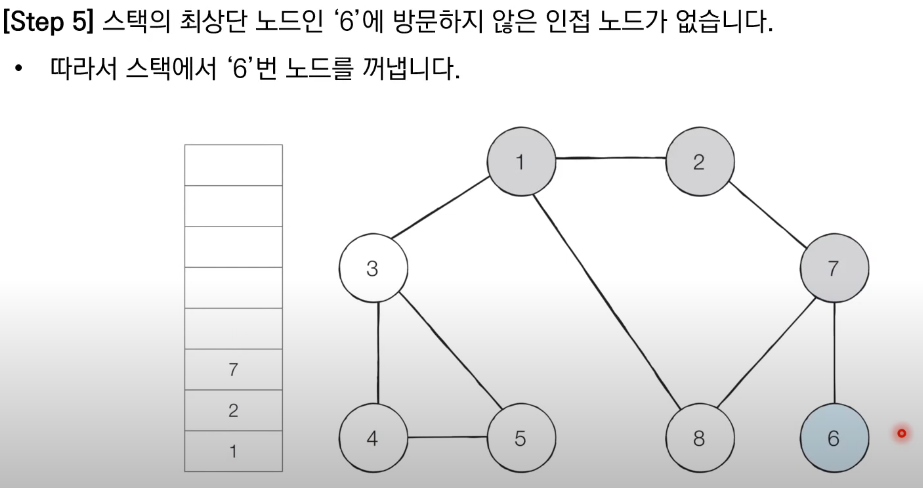
- 1 -> 2 -> 7 -> 6 -> 8 -> 3 -> 4 -> 5

In [7]:
# DFS 메서드 정의
def dfs(graph, v, visited):
    # 현재 노드를 방문 처리
    visited[v] = True
    print(v, end=' ')
    # 현재 노드와 연결된 다른 노드를 재귀적으로 방문
    for i in graph[v]:
        if not visited[i]:
            dfs(graph, i, visited)
            
# 각 노드가 연결된 정보를 표현 (2차원 리스트)
graph = [
    [],
    [2, 3 , 8],
    [1, 7],
    [1, 4, 5],
    [3, 5],
    [3, 4],
    [7], 
    [2, 6, 8],
    [1, 7]
]

# 각 노드가 방문된 정보를 표현 (1차원 리스트)
visited = [False] * 9

dfs(graph, 1, visited)

1 2 7 6 8 3 4 5 

# BFS (Breadth-First Search) - 최단 경로 문제 해결 방법
- 너비 우선 탐색, 그래프에서 가까운 노드부터 우선적으로 탐색하는 알고리즘
- 큐 자료구조 이용
1. 탐색 시작 노드를 큐에 삽입하고 방문 처리 한다.
2. 큐에서 노드를 꺼낸 뒤에 해당 노드의 인접 노드 중에서 방문하지 않은 노드를 모두 큐에 삽입하고 방문 처리.
3. 더 이상 2번의 과정을 수행할 수 없을때까지 반복

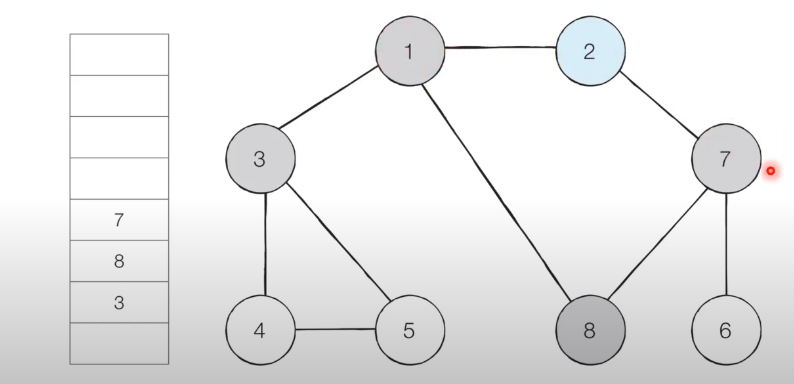
- 1 -> 2 -> 3 -> 8 -> 7 -> 4 -> 5 -> 6

In [8]:
from collections import deque

# BFS 메서드 정의
def bfs(graph, start, visited):
    # 큐(Queue) 구현을 위해 deque 라이브러리 사용
    queue = deque([start])
    # 현재 노드를 방문 처리
    visited[start] = True
    # 큐가 빌 때까지 반복
    while queue:
        # 큐에서 하나의 원소를 뽑아 출력하기
        v = queue.popleft()
        print(v, end=' ')
        # 아직 방문하지 않은 인접한 원소들을 큐에 삽입
        for i in graph[v]:
            if not visited[i]:
                queue.append(i)
                visited[i] = True


# 각 노드가 연결된 정보를 표현 (2차원 리스트)
graph = [
    [],
    [2, 3, 8],
    [1, 7],
    [1, 4, 5],
    [3, 5],
    [3, 4],
    [7], 
    [2, 6, 8],
    [1, 7]
]

# 각 노드가 방문된 정보를 표현 (1차원 리스트)
visited = [False] * 9

bfs(graph, 1, visited)

1 2 3 8 7 4 5 6 

# <문제> 음료수 얼려 먹기: 문제 설명
- N x M 크기의 얼음 틀이 있다. 구멍이 뚫려 있는 부분은 0, 칸막이가 존재하는 부분은 1로 표시한다. 구멍이 뚫려 있는 부분끼리 상, 하, 좌, 우로 붙어 있는 경우 서로 연결되어 있는 것으로 간주한다.
- 이때, 얼음 틀의 모양이 주어졌을 때, 생성되는 아이스크림의 개수를 구하는 프로그램을 작성하라. 
- 다음의 4 x 5 얼음  틀 예시는 아이스크림이 총 3개가 생성된다.
---
* 00110
* 00011
* 11111
* 00000
---
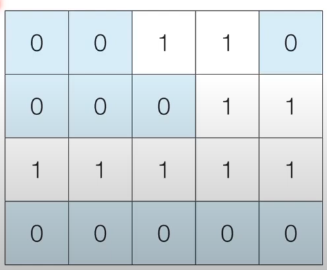

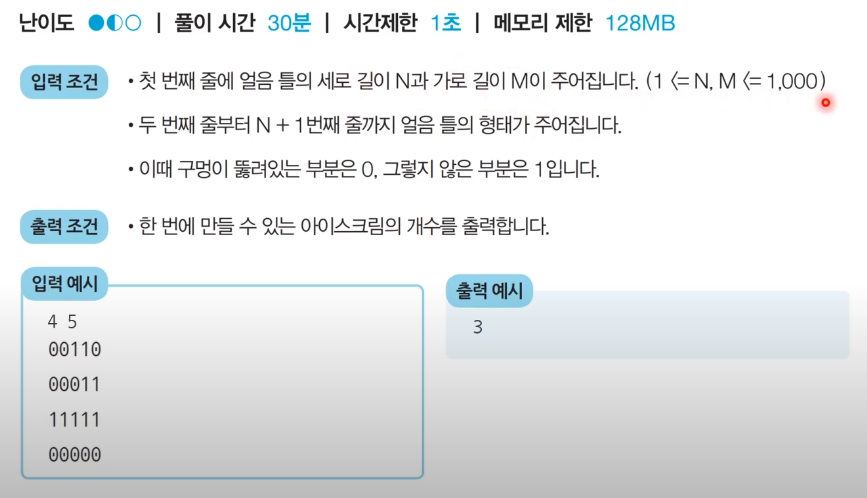


In [10]:
# DFS로 특정 노드를 방문하고 연결된 모든 노드들도 방문
def dfs(x, y):
    # 주어진 범위를 벗어나는 경우에는 즉시 종료
    if x <= -1 or x >= n or y <= -1 or y >= m:
        return False
    # 현재 노드를 아직 방문하지 않았다면
    if graph[x][y] == 0:
        # 해당 노드 방문 처리
        graph[x][y] = 1
        # 상, 하, 좌, 우의 위치들도 모두 재귀적으로 호출
        dfs(x - 1, y)
        dfs(x, y - 1)
        dfs(x + 1, y)
        dfs(x, y + 1)
        return True
    return False

# N, M 공백을 기준으로 구분하여 입력 받기
n, m = map(int, input().split())

# 2차원 리스트의 맵 정보 입력 받기
graph = []
for i in range(n):
    graph.append(list(map(int, input())))
    
# 모든 노드(위치)에 대하여 음료수 채우기
result = 0
for i in range(n):
    for j in range(m):
        # 현재 위치에서 DFS 수행
        if dfs(i, j) == True:
            result += 1

print(result) # 정답 출력


3


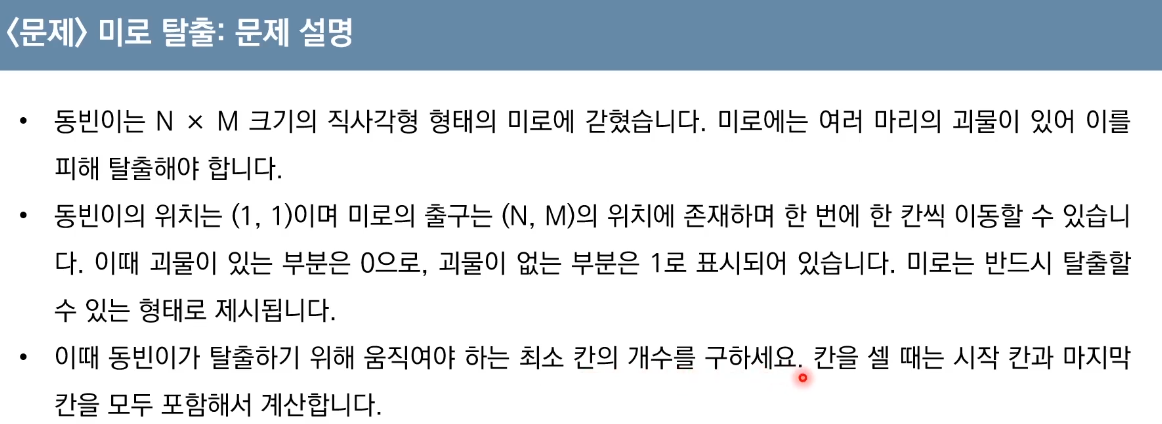

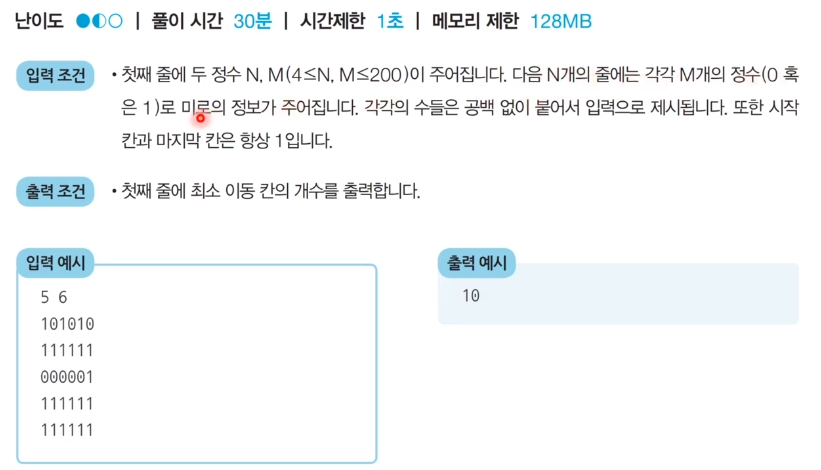

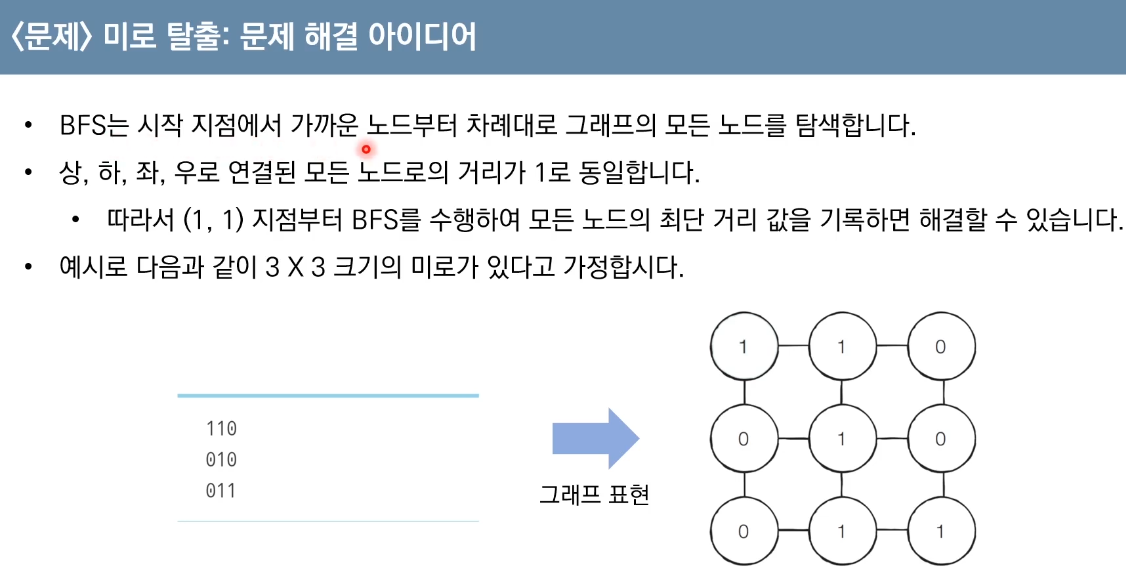

In [5]:
from collections import deque
# BFS 소스코드 구현
def bfs(x, y):
    # 큐(Queue)구현을 위해 deque 라이브러리 사용
    queue = deque()
    queue.append((x, y))
    # 큐가 빌 때까지 반복하기
    while queue:
        x, y = queue.popleft()
        # 현재 위치에서 4가지 방향으로의 위치 확인
        for i in range(4):
            nx = x + dx[i]
            ny = y + dy[i]
            # 미로 찾기 공간을 벗어난 경우 무시 
            if nx < 0 or nx >= n or ny < 0 or ny >= m:
                continue
            # 벽인 경우 무시
            if graph[nx][ny] == 0:
                continue
            # 해당 노드를 처음 방문하는 경우에만 최단 거리 기록
            if graph[nx][ny] == 1:
                graph[nx][ny] = graph[x][y] + 1
                queue.append((nx, ny))
    # 가장 오른쪽 아래까지의 최단 거리 반환
    return graph[n - 1][m - 1]

# N, M 공백을 기준으로 구분하여 입력 받기
n, m = map(int, input().split())

# 2차원 리스트의 맵 정보 입력 받기
graph = []
for i in range(n):
    graph.append(list(map(int, input())))
    
# 이동할 네 가지 방향 정의 (상, 하, 좌, 우)
dx = [-1, 1, 0, 0]
dy = [0, 0, -1, 1]

# BFS를 수행할 결과 출력 
print(bfs(0, 0))

10
